# Confidence intervals for normal means

**date** : 2021-04-16

**aim** : Calculate 100(1-a)% exact confidence intervals for normal means

**reference** : M248, computer book B, chapter 6

**packages** : `scipy`

**contents** :

1. Setup the notebook
2. (Single sample) Confidence interval for a normal mean
3. (Two samples) Confidence interval for the difference between two normal means

## 1. Setup the notebook

In [1]:
from src import load
from scipy.stats import t, probplot
from math import sqrt
import matplotlib.pyplot as plt

## 2. Single sample: Confidence interval for a normal mean

**aim** : Calculate a 90% $t$-interval for the height of eleven-year-old girls in Bradford

**reference** : activity 21

**data** : schoolgirls.csv

**description** : Height (cm) and weight (kg) of 30 eleven-year-old
schoolgirls from Bradford

### 2.1 Import the data

In [2]:
# import the data
schoolgirls = load.schoolgirls()

In [3]:
# assign column to local var
h = schoolgirls["Height"]

### 2.2 Visualise the data

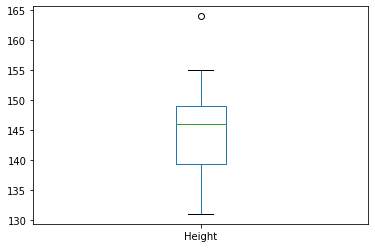

In [4]:
h.plot(kind="box")
plt.show()

### 2.3 Calculate a 100(1-a)% exact confidence interval for a normal mean

#### 2.3.1 Check assumption of normality

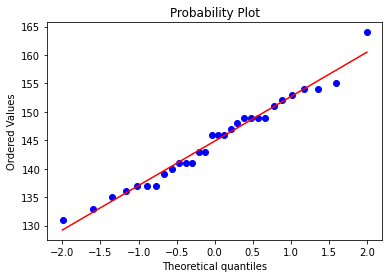

In [6]:
f, ax = plt.subplots()
probplot(x=h,plot=ax)
plt.show()

The points lie roughly along a straight-line.
This suggests a normal model is plausible for the heights of
schoolgirls in Bradford.

#### 2.3.2 Return the confidence interval

In [9]:
t.interval(
    alpha=0.9,      # ci to returns
    df=h.size-1,    # degrees of freedom
    loc=h.mean(),   # mean of the sample
    scale=h.std()/sqrt(h.size))     # ese

(142.50450100087164, 147.2288323324617)

## 3. (Two samples) Confidence interval for the difference between two normal means

**aim** : Calculate a 95% $t$-interval for the difference between the mean skull breadths of Etruscan and Italian skulls.

**reference** : activity 22

**data** : skulls.csv

**description** : Maximum skull breadth (in mm) of 84 skulls of Etruscan males and 70 skulls of modern Italian males.

### 3.1 Import the data

In [7]:
# import the sample
skulls = load.skulls()

In [8]:
# declare local vars
etr = skulls["Etruscans"].dropna()
ita = skulls["Italians"].dropna()

### 3.2 Visualise the data

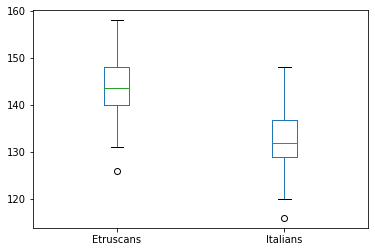

In [9]:
skulls.plot(kind="box")
plt.show()

### 3.3 Calculate a 100(1-a)% exact confidence interval for the difference between two normal means

#### 3.3.1 Check assumption of normality

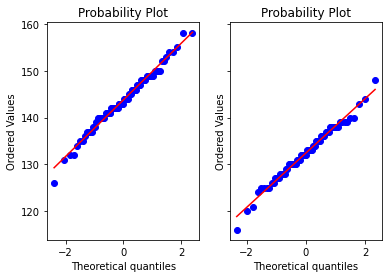

In [10]:
f, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, sharey=True)
ax1 = probplot(x=etr, plot=ax1)
ax1 = probplot(x=ita, plot=ax2)
plt.show()

#### 3.3.2 Check for equality of variance

The ratio should be the largest/smallest, so we use selection to select the largest variance.

In [11]:
if etr.var() > ita.var():
    print(etr.var()/ita.var())
else:
    print(ita.var()/etr.var())

1.078190046662236


The ratio is less than 3, so we can assume the underlying population variances are equal.

#### 3.3.3 Calculate key parameters

Calculate the mean difference:

$\overline{d} = \overline{x}_{1} - \overline{x}_{2}$

In [12]:
# get the diff
diff = etr.mean() - ita.mean()

Find the degrees of freedom:

$n_{1} + n_{2} - 2$

In [13]:
# get the degrees of freedom
dof = etr.size + ita.size - 2

Calcuate the pooled estimate of the variance:

$s^{2}_{P} = \dfrac{(n_{1} - 1)s^{2}_{1} + (n_{2} - 1)s^{2}_{2}}{n_{1} + n_{2} - 2}$

In [15]:
# get the population var
pop_var = (
    ((etr.size - 1) * etr.var() + (ita.size - 1) * ita.var())
    / dof)

Finally calculate the estimated standard error:

$s_{P} \sqrt{\dfrac{1}{n_{1}} + \dfrac{1}{n_{2}}}$

In [17]:
# get the ese
ese = sqrt(pop_var * (1/etr.size + 1/ita.size))

#### 3.3.4 Return the confidence interval

In [18]:
t.interval(
    alpha=0.95,
    df=dof,
    loc=diff,
    scale=ese)

(9.453650451007142, 13.208254310897594)